In [1]:
import cv2
from skimage import color
from skimage import io
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from tqdm import tqdm
from scipy import ndimage as ni
import itertools

In [2]:
img_ = io.imread('train/00001.png')
img = color.rgb2gray(img_)

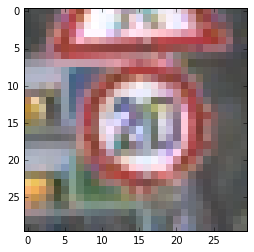

In [141]:
io.imshow(img)

In [142]:
img.shape

(30, 30, 3)

In [143]:
a[-1]

array([ 0.        ,  0.19073176,  0.43591216,  0.09005961, -0.1256949 ,
       -0.26588941, -0.15363294,  0.02095059, -0.06505412, -0.08563373,
        0.2066298 ,  0.20091216, -0.05218118, -0.93741098, -0.84850039,
        0.70586667,  0.4627302 , -0.74894745, -0.83120627,  0.50012941,
        0.99317725,  0.29135843,  0.2700298 ,  0.30861882, -0.08347843,
       -0.45600471, -0.32779216,  0.0445851 ,  0.        ])

In [101]:
I_x[0]

array([  288.,  1216.,  1716.,  -220.,   316.,  3092.,  3656.,  2088.,
          12., -1556., -2960.,  -828.,   472.,  -612.,  1392.,  2696.,
         804.,  -736., -2712., -4324., -1908.,   352.,  -468., -1096.,
        -840.,  -392.,    12.])

In [99]:
a.shape

(30, 29)

In [91]:
I_x.shape

(28, 27)

In [98]:
a = ni.convolve(img_, s_x, mode='mirror', cval=0.0)[:-2][:-2]

In [180]:
I_x = np.zeros((img.shape[0] - 2, img.shape[1] - 2))
I_y = np.zeros((img.shape[0] - 2, img.shape[1] - 2))
s_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
s_y = np.array([[-1, 2, 1], [0, 0, 0], [-1, -2, -1]])

for i in range(I_x.shape[0]):
    for j in range(I_x.shape[1]):
        I_x[i][j] = np.sum(s_x * img[i:i+3, j:j+3])
        I_y[i][j] = np.sum(s_y * img[i:i+3, j:j+3])
G = np.sqrt(I_x ** 2 + I_y ** 2)
theta = np.abs(np.arctan2(I_y, I_x))


In [178]:
Ix = ni.convolve(img, s_x, cval=0.0)[1:-1, 1:-1]
Iy = ni.convolve(img, s_y, cval=0.0)[:-2, :-2]

In [181]:
I_x[0]

array([ 0.18950627,  0.15303216,  0.49542314,  0.52399412, -0.2205298 ,
        0.1391698 ,  1.85175216,  1.96856941,  0.50906549, -0.1249149 ,
       -0.62424196, -1.41204431, -0.11436353,  0.99651765, -0.40423255,
       -0.65410039,  0.73164902,  1.03759451,  0.1979549 , -0.52419059,
       -1.16177804, -1.73794157, -1.06904784, -0.0156749 ,  0.09728667,
       -0.19784   , -0.3562651 , -0.2518698 ])

In [179]:
Ix[0]

array([-0.18950627, -0.15303216, -0.49542314, -0.52399412,  0.2205298 ,
       -0.1391698 , -1.85175216, -1.96856941, -0.50906549,  0.1249149 ,
        0.62424196,  1.41204431,  0.11436353, -0.99651765,  0.40423255,
        0.65410039, -0.73164902, -1.03759451, -0.1979549 ,  0.52419059,
        1.16177804,  1.73794157,  1.06904784,  0.0156749 , -0.09728667,
        0.19784   ,  0.3562651 ,  0.2518698 ])

In [108]:
G = np.sqrt(I_x ** 2 + I_y ** 2)
theta = np.abs(np.arctan2(I_y, I_x))

/home/ubuntu/anaconda3/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warnings.warn("Float image out of standard range; displaying "


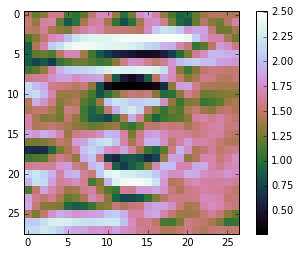

In [128]:
io.imshow(theta)

In [129]:
np.sum(theta)

1184.4640815310306

/home/ubuntu/anaconda3/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warnings.warn("Float image out of standard range; displaying "


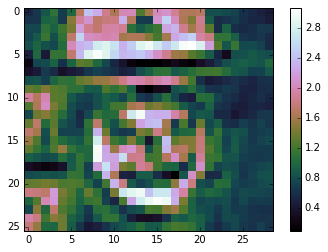

In [111]:
io.imshow(G)

In [48]:
cellRows = cellCols = 10
binCount = 8
h = I_x.shape[0]
w = I_x.shape[1]
img_hists = np.zeros((np.ceil(h * 1. / cellRows), np.ceil(w * 1. / cellCols), binCount))
print img_hists.shape
for i in xrange(h):
    for j in xrange(w):
        a = theta[i][j] * binCount / np.pi
        img_hists[i / cellRows][j / cellCols][a] += G[i][j]
        

/home/sonya/.local/lib/python2.7/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/sonya/.local/lib/python2.7/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(53, 60, 8)


In [68]:
blockRowCells = blockColCells = 10
stepX = stepY = 3
eps = 1e-10
res = []
blocks = np.zeros((np.ceil(img_hists.shape[0] * 1. / blockRowCells), np.ceil(img_hists.shape[1] * 1. / blockColCells)))
for i in xrange(0, img_hists.shape[0], stepX):
    for j in xrange(0, img_hists.shape[1], stepY):
        v = np.concatenate(img_hists[i : i + blockRowCells, j : j + blockColCells, :])
        res.append(v / np.sqrt(np.sum(v ** 2) + eps))
descr = np.concatenate(res)

/home/sonya/.local/lib/python2.7/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [3]:
def extract_hog(img, cellRowsCnt=10, cellColsCnt=10, binCount=8, blockRowCells=4, blockColCells=4, step_x=2, step_y=2, eps=1e-10): 
    I_x = np.zeros((img.shape[0] - 2, img.shape[1] - 2))
    I_y = np.zeros((img.shape[0] - 2, img.shape[1] - 2))
    h = I_x.shape[0]
    w = I_y.shape[1]
    s_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    s_y = np.array([[-1, 2, 1], [0, 0, 0], [-1, -2, -1]])
#     for i in range(h):
#         for j in range(w):
#             I_x[i][j] = np.sum(img[i:i+3, j:j+3] * s_x)
#             I_y[i][j] = np.sum(img[i:i+3, j:j+3] * s_y)
    I_x = ni.convolve(img, s_x, mode='constant', cval=0.0)[1:-1, 1:-1]
    I_y = ni.convolve(img, s_y, mode='constant', cval=0.0)[1:-1, 1:-1]
    G = np.sqrt(I_x ** 2 + I_y ** 2)
    theta = np.abs(np.arctan2(I_y, I_x))
    
    cellRows = h / cellRowsCnt
    cellCols = w / cellColsCnt
    
    #img_hists = np.zeros((np.ceil(h * 1. / cellRows), np.ceil(w * 1. / cellCols), binCount))
    blocks = theta * binCount / np.pi
    img_hists = np.zeros((cellRowsCnt, cellColsCnt, binCount))
#     for i in range(h):
#         for j in range(w):
#             a = theta[i][j] * binCount / np.pi
#             img_hists[i / cellRows][j / cellCols][a] += G[i][j]
    def pixel_fun(i, j):
        img_hists[i // cellRows, j // cellCols, blocks[i, j]] += G[i][j]
    pixels = np.array(list(itertools.product(range(h), range(w))))
    np.vectorize(pixel_fun)(pixels[:, 0], pixels[:, 1])
    
    res = []
    for i in range(0, img_hists.shape[0], step_x):
        for j in range(0, img_hists.shape[1], step_y):
            v = np.concatenate(img_hists[i : i + blockRowCells, j : j + blockColCells, :])
            res.append(v / np.sqrt(np.sum(v ** 2) + eps))
    return np.concatenate(np.concatenate(res))
    

In [158]:
res = extract_hog(img)

(30, 30, 3) (30, 30) 28 28


/home/ubuntu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:27: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [135]:
res.shape

(324, 8)

In [4]:
from sklearn import svm

In [5]:
def f(x):
    res = str(x)
    return 'train/' + '0' * (5 - len(res)) + res + '.png'
filenames = [f(x) for x in range(39209)]
print(filenames[:5])

['train/00000.png', 'train/00001.png', 'train/00002.png', 'train/00003.png', 'train/00004.png']


In [ ]:
images = [color.rgb2gray(io.imread(x)) for x in filenames]

In [184]:
%%time
descriptors = []
for j in tqdm(range(500)):
    descriptors.append(extract_hog(images[j]))

100%|██████████| 500/500 [00:00<00:00, 1970.01it/s]

CPU times: user 240 ms, sys: 0 ns, total: 240 ms
Wall time: 255 ms


In [55]:
lables = pd.DataFrame(pd.read_csv('train/gt.csv'))

In [57]:
lables = lables.class_id

In [60]:
lables.shape

(39209,)

In [79]:
descriptors[0]

[[0.0, 0.0, 0.0, 0.0, 0.24574737718941916, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.35675836652792714, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.4963461292187963, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.14058347361814497, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.2116633871391468, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.3161631121832702, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.2679341196539913, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.1427373758527514, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.21270201237372136, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.16437151438394018, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.2186153290699155, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.1440215290212378, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.20290136544794035, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.14083854313047434, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.22317206778397, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.24016684339372973, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.4466092898005492, 0.0, 0.0, 0.0],
 [0.0, 0

In [77]:
clf = svm.SVC()
clf.fit(descriptors, lables[:500])

ValueError: Found array with dim 3. Estimator expected <= 2.